<a href="https://colab.research.google.com/github/sahilbatool/Band-Structure-Visualization-of-a-1D-Crystal-Using-the-Tight-Binding-Model/blob/main/Band%20Structure%20Visualization%20Tight-Binding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Band Structure Visualization of a 1D Crystal Using the Tight-Binding Model

**Author:** Sahil Batool


 This repository contains a Colab notebook that simulates and visualizes  the electronic band structure of a 1D crystal using tight binding approximation. A python simulation was developed to simulate how discrete atomic energy levels can form continuous bands as a result of orbital overlap. By varying hopping strengths and atomic energy levels we've modeled multiple bands and bandgaps.   
 The findings demonstrate how energy dispersion in periodic systems results in significant physical characteristics like bandwidth, Brillouin zone limits, and bonding/antibonding states.


## I. **Introduction**
In a crystal electrons are not restricted to a single atom. Quantum mechanics predicts that a bound electron exists in a superposition of discrete orbitals of definite energy. In crystalline solids atomic orbitals combine and overlap due to interaction between the neighboring atoms leading to the formation of energy bands, which we've modeled using the tight-binding approach.  Understanding the behavior of electrons in such bands is crucial in material science. The energy dispersion relation for a 1D periodic lattice is visualized in this report and Python was used for the simulation along with the NumPy and Matplotlib libraries.


## **II. Methodology**

Tight binding model assumes that electrons are strongly bound to their atomic orbitals but can hop around to their neighboring atoms as a result of orbital overlap and the total wavefunction is the linear combination of these atomic orbitals.


The simulation uses the nearest neighbour tight-binding dispersion for a 1D lattice:  
<br>
$$
E(k) = E_0 - 2t\cos(ka)
$$ <br>       

A uniform k-sampling across the first Brillouin zone (−π/a to +π/a) is used. In the 1D case, the bandwidth is 4t and band curvature depends on sign and magnitude of t. The notebook computes and plots the dispersion for each case.
    
## **III. Mathematical Derivation**    

At $k=0$:     
<br>
$$
 E_{min}(k) = E_0 - 2t
$$
<br>
At $k = \pm \pi / a$:

$$
 E_{max}(k) = E_0 + 2t
$$
<br>
Thus, the bandwidth is:     

$$
\text{Bandwidth} = E_{max} - E_{min} = 4~\text{t}
$$    <br>
The range $k \in [-\pi / a , \pi / a]$ defines the first Brillouin zone for a 1D crystal. The resulting band ranges from $E_0 − 2t$ to $E_0 + 2t$ giving a total bandwidth of 4t. This relation shows how continuous energy bands are formed from discrete atomic energy levels and highlights the role of orbital overlap and the crystal's periodic structure

For Valence band:    

$$
E_{min}^{(v)} = E_0 - 2t = -3 - 2(1.0) = -5~\text{eV}
$$  <br>

$$
E_{max}^{(v)} = E_0 + 2t = -3 + 2(1.0) = -1.0~\text{eV}
$$  <br>

$$
\text{Bandwidth}^{(v)} = E_{max}^{(v)} - E_{min}^{(v)} = 4.0~\text{eV}
$$  <br>

For Conduction Band:    

$$
E_{min}^{(c)} = E_0 - 2t = 3 - 2(0.5) = 2~\text{eV}
$$  <br>

$$
E_{max}^{(c)} = E_0 + 2t = 3 + 2(0.5) = 4.0~\text{eV}
$$  <br>

$$
\text{Bandwidth}^{(c)} = E_{max}^{(c)} - E_{min}^{(c)} = 2.0~\text{eV}
$$    <br>

For Defect band:    

$$
E_{min}^{(d)} = E_0 - 2t = 0.5 - 2(0.1) = 0.3~\text{eV}
$$  <br>

$$
E_{max}^{(d)} = E_0 + 2t = 0.5 + 2(0.1) = 0.7~\text{eV}
$$  <br>

$$
\text{Bandwidth}^{(d)} = E_{max}^{(d)} - E_{min}^{(d)} = 0.4~\text{eV}
$$    <br>

Band Gap (Valence to Conduction):    
<br>
$$
E_g = E_{min}^{(c)} - E_{max}^{(v)} = 2.0 - (-1.0) = 3.0~\text{eV}
$$ <br>

The defect band lies inside the band gap (0.3–0.7 eV), providing intermediate states that can facilitate electron excitation.  

## **IV. Simulation Implementation**    
The simulation was implemented in Google Colab using Python, leveraging NumPy for numerical operations and Matplotlib for visualization.  

•	A range of relevant k-values was defined within the first Brillouin zone $[−π/a , +π/a]$   <br>

•	Energy bands were computed using the tight-binding formula  <br>
    
•	Graphs were plotted to visualize the energy dispersion and the effects of added dopant states.     

 Plots showed how band curvature, position, and bands gap changed with these parameters.

 Below is the function we'll call to calculate our band structure across a path of k-points.

   


In [6]:
# Setup: imports and utility functions
import numpy as np
import matplotlib.pyplot as plt
import os

# Lattice constant and k-grid
a = 1
k = np.linspace(-np.pi/a, np.pi/a, 501)

def band(epsilon, t, k, a=1):
    """Nearest-neighbour 1D tight-binding dispersion."""
    return epsilon - 2*t*np.cos(k*a)

# Ensure results folder exists
os.makedirs('results', exist_ok=True)
print('results/ folder ready — figures will be saved there.')


The next four code cells compute and plot each case. Run top to bottom to regenerate images.  

In [ ]:
#Case 1: Valence and Conduction Bands

epsilon_v, t_v = -3, 1
epsilon_c, t_c = 3, 0.5

E_v = band(epsilon_v, t_v, k, a)
E_c = band(epsilon_c, t_c, k, a)

fig = plt.figure(figsize=(7,4))
plt.plot(k, E_v, label='Valence Band (E_v = -3, t_v = 1)')
plt.plot(k, E_c, label='Conduction Band (E_c = +3, t_c = 0.5)')
plt.xlabel('Wave vector k')
plt.ylabel('Energy (eV)')
plt.title('Valence and Conduction Bands')
plt.legend(loc='best')
plt.grid(True)
fig.savefig('results/valence_conduction.png', bbox_inches='tight', dpi=150)
plt.show()




In [ ]:
#Case 2: Defect (dopant) band

epsilon_d, t_d = 0.5, 0.1
E_d = band(epsilon_d, t_d, k, a)

#Valence and Conduction Bands
epsilon_v, t_v = -3.0, 1.0
epsilon_c, t_c = 3.0, 0.5

E_v = band(epsilon_v, t_v, k, a)
E_c = band(epsilon_c, t_c, k, a)

fig = plt.figure(figsize=(7,4))
plt.plot(k, E_v)
plt.plot(k, E_c)
plt.plot(k, E_d, label='Defect Band (dopant states: E_d = 0.5, t = 0.1)')

plt.xlabel(' Wave vector k')
plt.ylabel('Energy (eV)')
plt.title('Dopant-induced mid-gap states')
plt.legend(loc='center')
plt.grid(True)
fig.savefig('results/defect_band.png', bbox_inches='tight', dpi=150)
plt.show()



In [ ]:
# Case 3: localized states (t = 0)
epsilon_flat, t_flat = -3.0, 0.0
E_flat = band(epsilon_flat, t_flat, k, a)

fig = plt.figure(figsize=(7,4))
plt.plot(k, E_flat, label= 'flat band (t=0)')
plt.xlabel('Wave vector k ')
plt.ylabel('Energy (eV)')
plt.title('Localized states (t = 0)')
plt.legend(loc='best')
plt.grid(True)
fig.savefig('results/flat_band.png', bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
# Case 4: Inverted band (t < 0)
epsilon_inv, t_inv = +3.0, -1.0
E_inv = band(epsilon_inv, t_inv, k, a)

epsilon_v, t_v = -3.0, 1.0
E_v = band(epsilon_v, t_v, k, a)

fig = plt.figure(figsize=(7,4))
plt.plot(k, E_inv, label='Inverted band (t=-1)')
plt.plot(k, E_v)
plt.xlabel('Wave vector k')
plt.ylabel('Energy (eV)')
plt.title('Inverted Band (t < 0)')
plt.legend(loc='best')
plt.grid(True)
fig.savefig('results/inverted_band.png', bbox_inches='tight', dpi=150)
plt.show()


## **V. Results**    

The simulation successfully visualized the formation of energy bands and their dependence on orbital overlap and energy level. For the Valence band with $t_v = 1$ and  $E_v = -3 eV $ the bandwidth was $4  eV$ and the band spanned from $ -5 $ $eV$  to $ −1  eV $. The Conduction Band, with $t_c = 0.5 $  and $E_c = 3 eV $  showed a narrower band $2$  $eV$ wide, spanning from $ 2 $ $eV $  to $ 4  eV $.

The energy gap between the two bands was $3$ $eV$ (from $-1$ $eV$ to $+2$ $eV)$, which classifies the material as a wide band gap semiconductor. This is comparable to materials like Zinc Sulfide (ZnS) which has a band gap of approximately $3.54$ $eV$. Wide band gap semiconductors are essential in high-power, high-temperature, and optoelectronic applications.

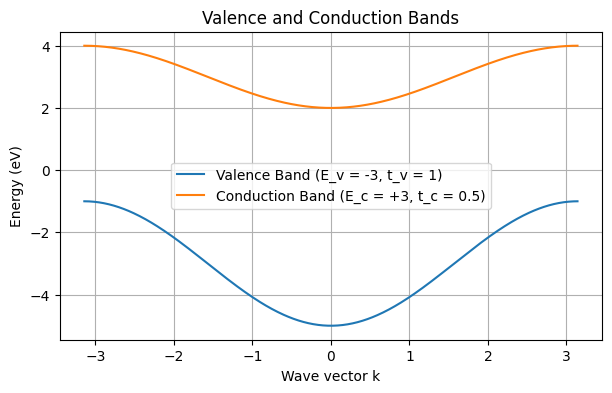

The plots clearly show a narrow defect band within the band gap. Such localized states can facilitate carrier excitation at lower energies, which is consistent with the expected role of dopant states within a material.  

This result conceptually explains why doping can enhance the electrical conductivity and sensing properties of certain materials, as electrons can be thermally excited via these defect states instead of requiring full valence to conduction band transitions.


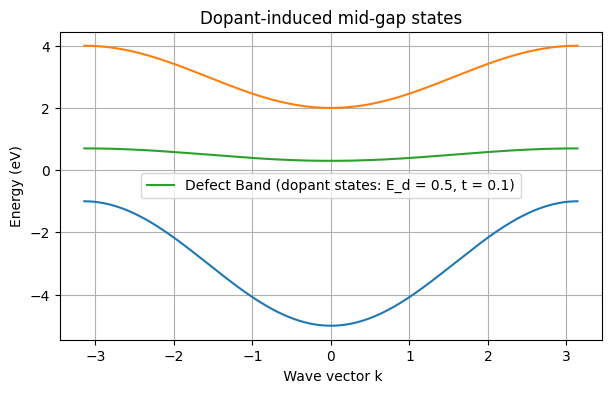

Limiting cases were studied and simulated using the tight binding approach. <br>

Adjusting the sign and magnitude of t confirmed theoretical expectations:
<br>


*   $t=0$ : the band collapses into a flat line, indicating localized electrons and no interaction among neighboring atoms.





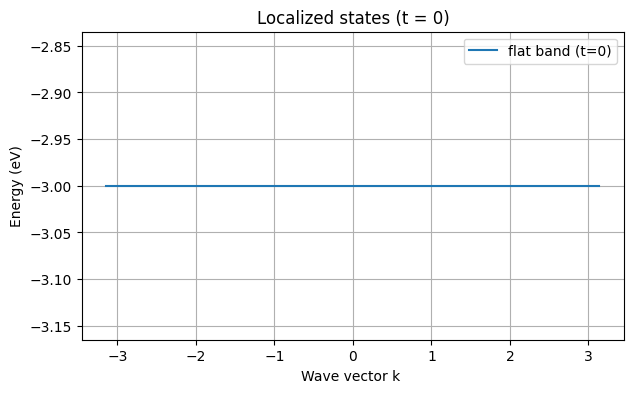

•	$t < 0$ : the band shape flips, placing the anti-bonding state at k=0.

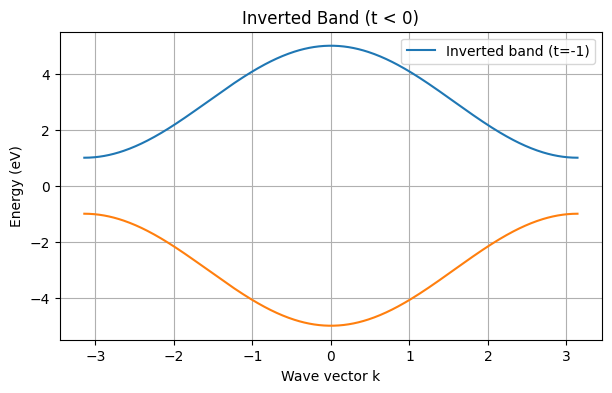

## **VI. Conclusion**
This project provided a visual and computational understanding of the tight-binding model in one dimension. By simulating band formation for different parameters it clarified key solid-state physics concepts such as Brillouin zones, energy dispersion, and the effect of orbital overlap. These insights are foundational for understanding real materials, especially semiconductors and nanostructures, and form a basis for further study in material science. Additionally Introducing a defect band within the band gap  provided a theoretical perspective  on how doping alters the electronic structure enhancing charge transport supporting the material’s potential in humidity sensing applications.


## **VII. References**  


1.  Narozniak, M. (2020, May 07). The 1-D Tight-Binding Model. <br>
    https://mareknarozniak.com/2020/05/07/tight-binding/

2.  Medlar, W. (2016). "*Tight-Binding Calculation of the Band Structure of Silicon*", GitHub Gist. <br>
    https://gist.github.com/wmedlar/3987bfd8a0f38f7dff4e



